In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
inputData=pd.read_csv("lynx_tedx_credit_card_clustering.csv").set_index("CUST_ID")
inputData.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
#okay, we have the data
feature_columns=list(inputData.columns)
#no missing values, great
inputData.describe()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
inputData.fillna(inputData.mean(),inplace=True)

In [7]:
#fire up the clustering
from sklearn.cluster import KMeans
X=inputData.values
#fit the clusterer
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
#why 5?? - we will talk about this later
#then predict
inputData["CLUSTERING_1"]=kmeans.labels_
inputData["CLUSTERING_1"].value_counts()

4    5443
0    2461
2     879
1     111
3      56
Name: CLUSTERING_1, dtype: int64

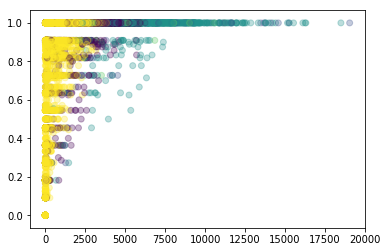

In [9]:
#so what IS wrong?
plt.scatter(inputData["BALANCE"],inputData["BALANCE_FREQUENCY"],c=inputData["CLUSTERING_1"],alpha=0.3)

In [10]:
#issue nr.1: uneven cluster sizes
#that is not necessarily wring methodologically, but is rather bad for the business case
#lets check out these clusters using a boxplots


In [11]:
inputData.shape

(8950, 18)

In [12]:
balance_features=["BALANCE","BALANCE_FREQUENCY"]
purchase_features=["PURCHASES","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","PURCHASES_FREQUENCY","ONEOFF_PURCHASES_FREQUENCY",\
                   "PURCHASES_INSTALLMENTS_FREQUENCY","PURCHASES_TRX"]
cash_advance_features=["CASH_ADVANCE","CASH_ADVANCE_FREQUENCY","CASH_ADVANCE_TRX"]
credit_features=["CREDIT_LIMIT","PAYMENTS","MINIMUM_PAYMENTS","PRC_FULL_PAYMENT"]
tenure_features=["TENURE"]
feature_groups=[balance_features,purchase_features,cash_advance_features,credit_features,tenure_features]


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2067: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002651F37FB00>,
      dtype=object)

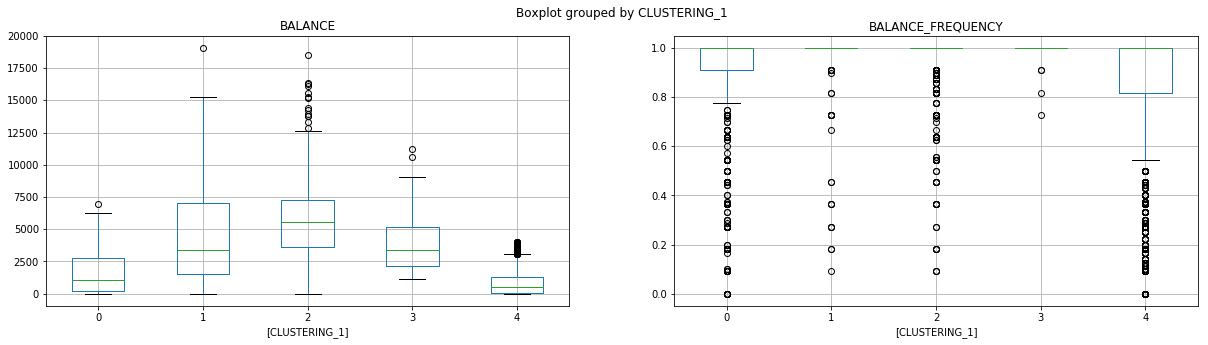

In [13]:
#create boxplot
plt.close("all")
fig, axs = plt.subplots(1,len(balance_features),figsize=(20,  5), sharey=False)

inputData[balance_features+["CLUSTERING_1"]].boxplot(by="CLUSTERING_1",ax=axs)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2067: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002651F514940>,
      dtype=object)

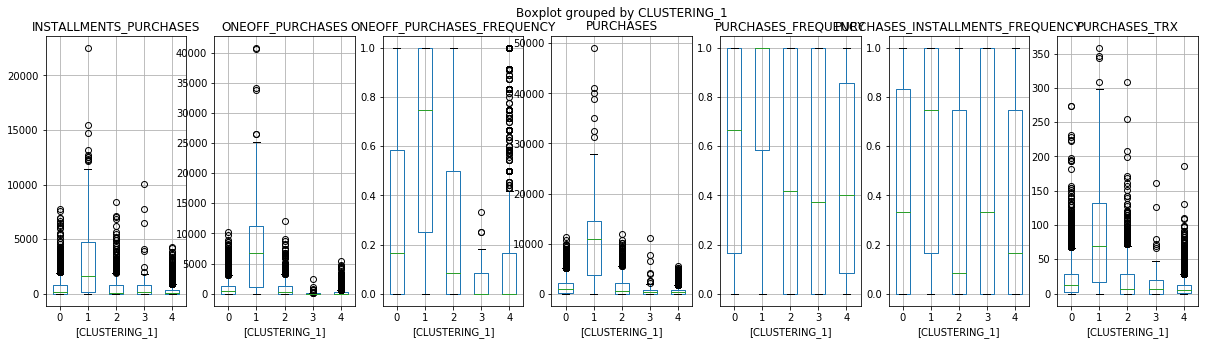

In [14]:
fig, axs = plt.subplots(1,len(purchase_features),figsize=(20,  5), sharey=False)

inputData[purchase_features+["CLUSTERING_1"]].boxplot(by="CLUSTERING_1",ax=axs)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2067: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002651F366F60>,
      dtype=object)

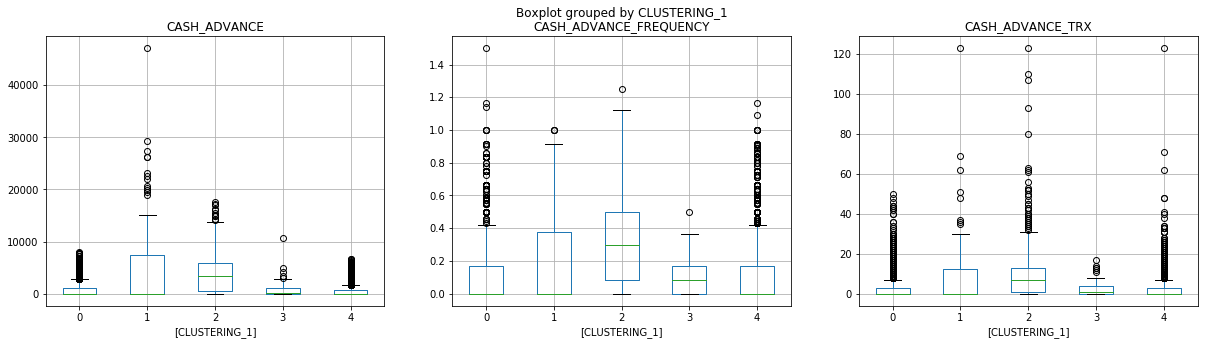

In [15]:
fig, axs = plt.subplots(1,len(cash_advance_features),figsize=(20,  5), sharey=False)

inputData[cash_advance_features+["CLUSTERING_1"]].boxplot(by="CLUSTERING_1",ax=axs)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2067: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026521CE0358>,
      dtype=object)

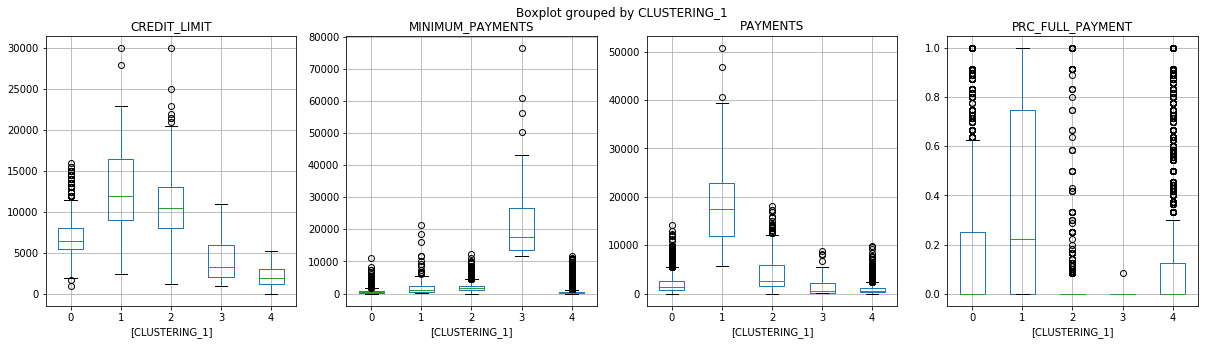

In [16]:
fig, axs = plt.subplots(1,len(credit_features),figsize=(20,  5), sharey=False)

inputData[credit_features+["CLUSTERING_1"]].boxplot(by="CLUSTERING_1",ax=axs)


In [17]:
#separating features by standard deviation
high_stdev_features=[col for col in inputData.columns if inputData[col].std()>2000]
high_stdev_features
low_stdev_features=[col for col in inputData.columns if inputData[col].std()<2000]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2067: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000265225EE630>,
      dtype=object)

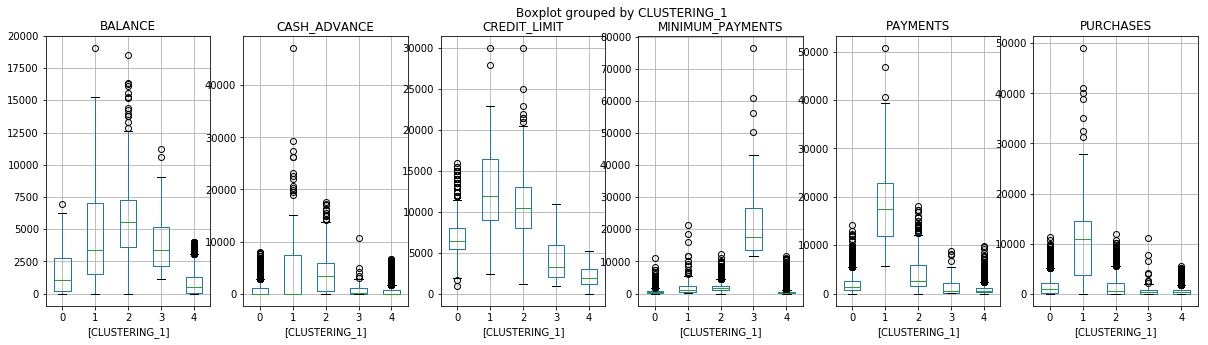

In [18]:
fig, axs = plt.subplots(1,len(high_stdev_features),figsize=(20,  5), sharey=False)

inputData[high_stdev_features+["CLUSTERING_1"]].boxplot(by="CLUSTERING_1",ax=axs)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2067: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026523C071D0>,
      dtype=object)

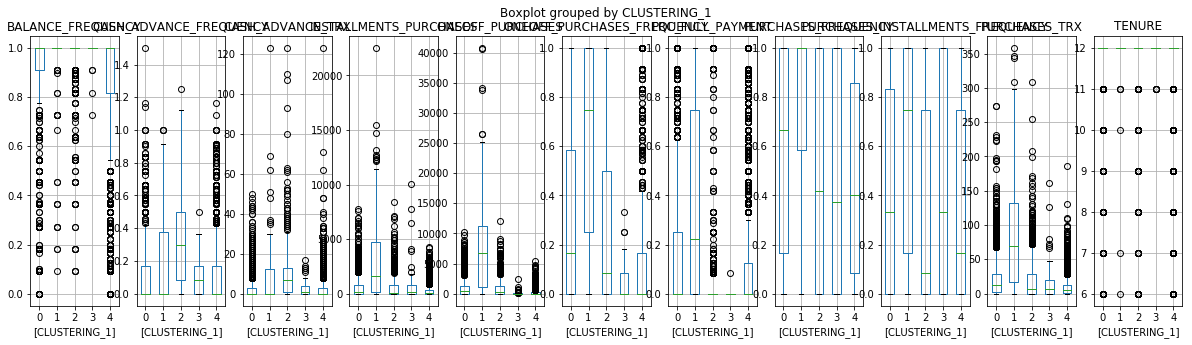

In [19]:
fig, axs = plt.subplots(1,len(low_stdev_features)-1,figsize=(20,  5), sharey=False)

inputData[low_stdev_features].boxplot(by="CLUSTERING_1",ax=axs)


In [20]:
#okay, so what is wrong with all this?
#maybe an example will help
X=np.random.rand(100,2)
#now column 2 has stdev 10, column 1 has stdev 1
X[:,1]=X[:,1]*10
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
X = np.insert(X, 2, values=np.ravel(kmeans.labels_), axis=1) # Insert values before column 3
X_pd=pd.DataFrame(X,columns=["X","Y","CLUSTER"])


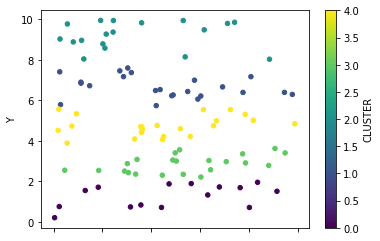

In [21]:
X_pd.plot.scatter(x="X",y="Y",c="CLUSTER",colormap='viridis')
#not much of a clustering, is it?
#why? because the scale  is not the same!!!
#scale or stdev?.
#if we just scale, then the distance will be okay, but there are still going to be outliers

In [22]:
inputData.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'CLUSTERING_1'],
      dtype='object')

In [424]:
#so lets normalize our  dataset
inputData.drop("CLUSTERING_1",inplace=True,axis=1)
#inputDataNormalized=(inputData-inputData.mean())/inputData.std()
#inputDataNormalized=(inputData-inputData.min())/(inputData.max()-inputData.min())

inputDataNormalized.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,-0.731948,-0.249421,-0.424876,-0.356914,-0.349059,-0.466759,-0.806445,-0.678623,-0.707274,-0.675311,-0.476043,-0.511305,-0.960380,-0.528949,-3.109502e-01,-0.525522,0.360659
C10002,0.786917,0.134317,-0.469526,-0.356914,-0.454551,2.605459,-1.221690,-0.678623,-0.916944,0.573931,0.110068,-0.591763,0.688601,0.818596,8.930522e-02,0.234214,0.360659
C10003,0.447110,0.518055,-0.107662,0.108882,-0.454551,-0.466759,1.269772,2.673302,-0.916944,-0.675311,-0.476043,-0.109014,0.826016,-0.383783,-1.016575e-01,-0.525522,0.360659
C10004,0.049096,-1.016896,0.232045,0.546159,-0.454551,-0.368633,-1.014069,-0.399297,-0.916944,-0.258899,-0.329515,-0.551534,0.826016,-0.598655,2.292675e-15,-0.525522,0.360659
C10005,-0.358755,0.518055,-0.462037,-0.347275,-0.454551,-0.466759,-1.014069,-0.399297,-0.916944,-0.675311,-0.476043,-0.551534,-0.905414,-0.364347,-2.657764e-01,-0.525522,0.360659


In [425]:
#lets cluster again!
X=inputDataNormalized.values
#fit the clusterer
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
#why 5?? - we will talk about this later
#then predict
inputData["CLUSTERING_1"]=kmeans.labels_
inputData["CLUSTERING_1"].value_counts()

2    3922
0    2413
4    1388
1    1142
3      85
Name: CLUSTERING_1, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2067: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024D35873AC8>,
      dtype=object)

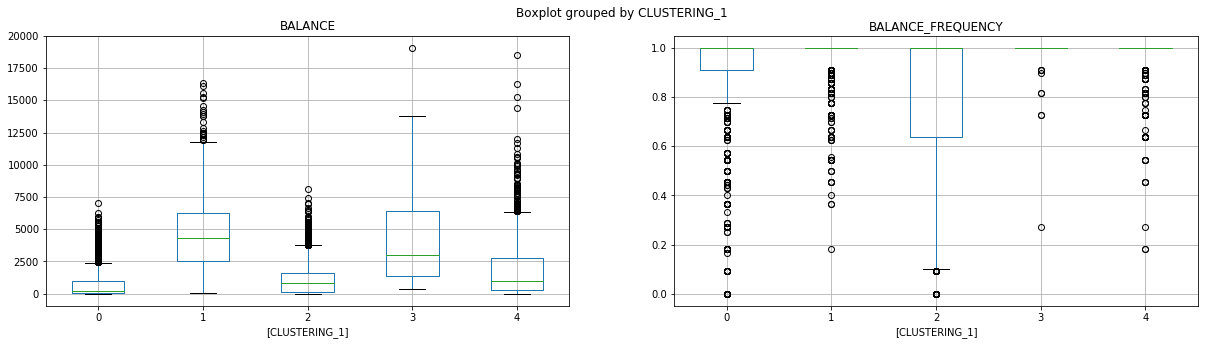

In [426]:
#a bit more balanced clustering, lets see our variables!
#create boxplot
plt.close("all")
fig, axs = plt.subplots(1,len(balance_features),figsize=(20,  5), sharey=False)

inputData[balance_features+["CLUSTERING_1"]].boxplot(by="CLUSTERING_1",ax=axs)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2067: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024D3565A710>,
      dtype=object)

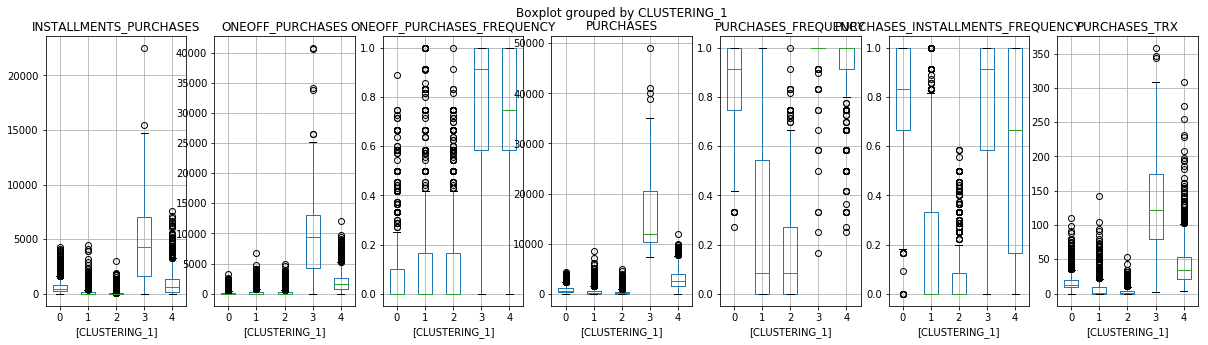

In [427]:
#create boxplot
plt.close("all")
fig, axs = plt.subplots(1,len(purchase_features),figsize=(20,  5), sharey=False)

inputData[purchase_features+["CLUSTERING_1"]].boxplot(by="CLUSTERING_1",ax=axs)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2067: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024D362C0FD0>,
      dtype=object)

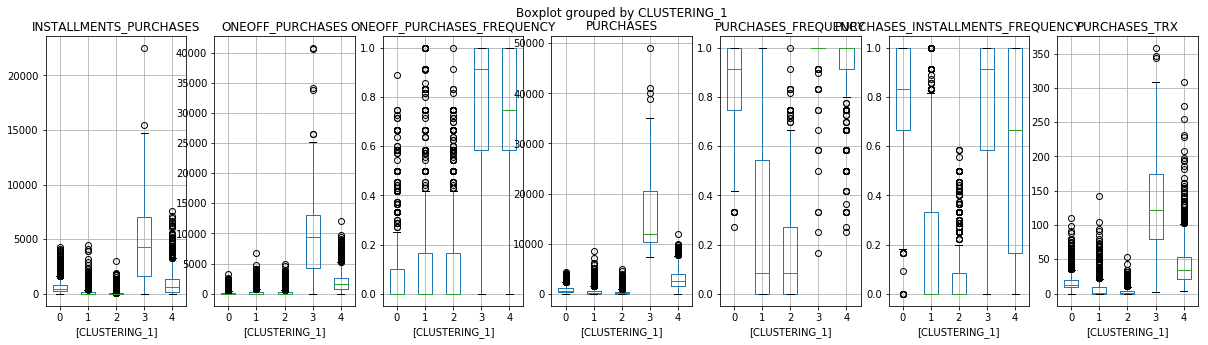

In [428]:
#create boxplot
plt.close("all")
fig, axs = plt.subplots(1,len(purchase_features),figsize=(20,  5), sharey=False)

inputData[purchase_features+["CLUSTERING_1"]].boxplot(by="CLUSTERING_1",ax=axs)

Text(0.5,1,'ORIGINAL DATA')

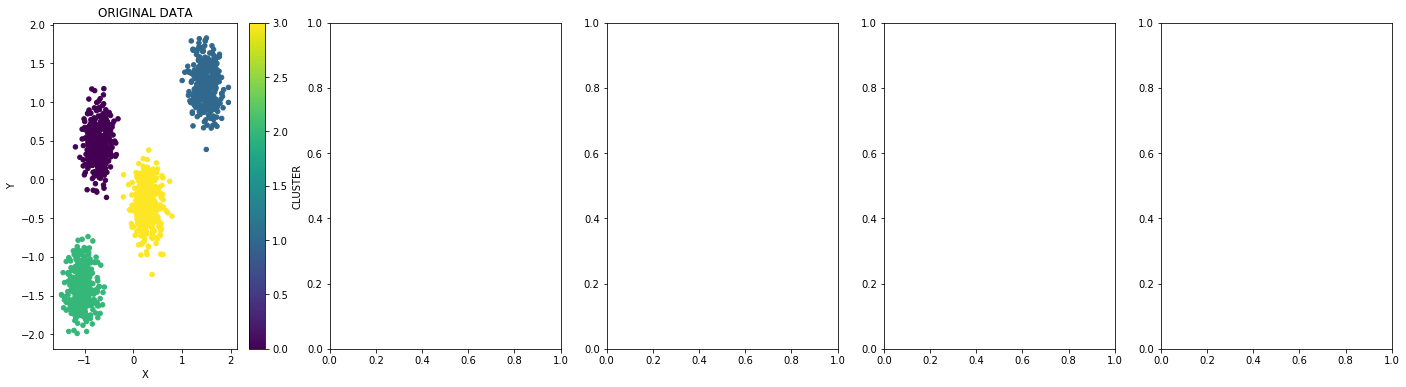

In [429]:
#first, original data
from sklearn import cluster, datasets
X, y = datasets.make_blobs(n_samples=1500,centers=4,random_state=9211134)
fig,axs=plt.subplots(1,5,figsize=(24,6))
X_pd=pd.DataFrame(X,columns=["X","Y"])
X_pd=(X_pd-X_pd.mean())/X_pd.std()

kmeans = KMeans(n_clusters=4, random_state=0).fit(X_pd.values)

X_pd["CLUSTER"]=kmeans.labels_
X_pd.plot.scatter(x="X",y="Y",c="CLUSTER",colormap='viridis',ax=axs[0])
axs[0].set_title("ORIGINAL DATA")

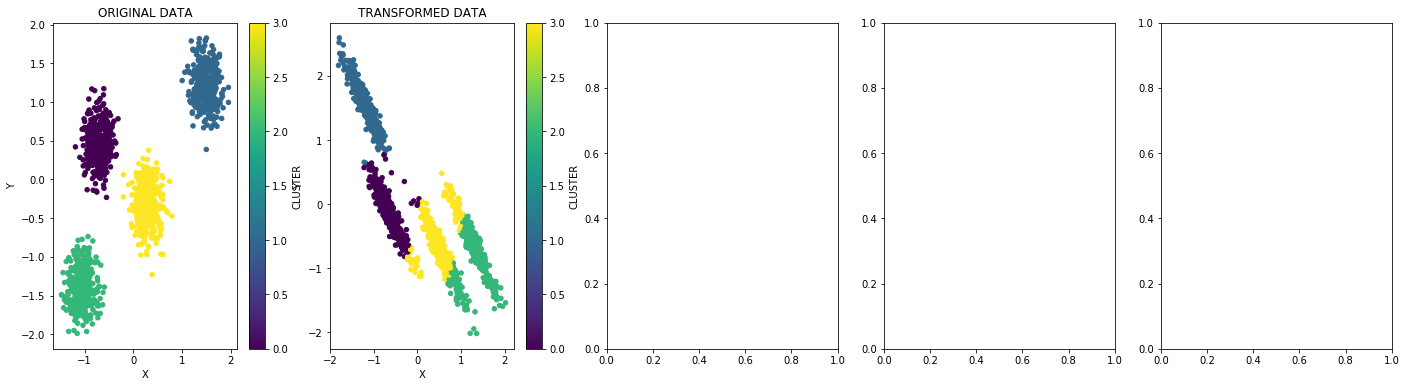

In [430]:
#normal state
#my next question: are we done? is this correct?
#maybe an example would help...
#okay, so what is wrong with all this?
#maybe an example will help

transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
X_pd=pd.DataFrame(X_aniso,columns=["X","Y"])
X_pd=(X_pd-X_pd.mean())/X_pd.std()
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_pd.values)

X_pd["CLUSTER"]=kmeans.labels_
X_pd.plot.scatter(x="X",y="Y",c="CLUSTER",colormap='viridis',ax=axs[1])
axs[1].set_title("TRANSFORMED DATA")
fig

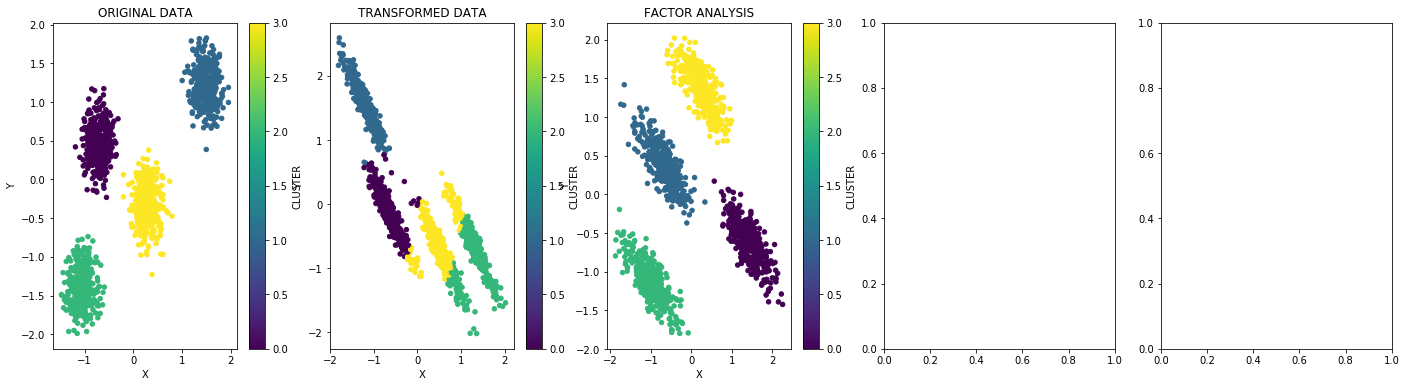

In [431]:
#first try factor analysis
from sklearn.decomposition import FactorAnalysis
transformer = FactorAnalysis(n_components=5, random_state=123456)
#inputData.drop("CLUSTERING_1",axis=1,inplace=True)
X_FA = transformer.fit_transform(X_aniso)

X_pd=pd.DataFrame(X_FA,columns=["X","Y"])
X_pd=(X_pd-X_pd.mean())/X_pd.std()
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_pd.values)

X_pd["CLUSTER"]=kmeans.labels_
X_pd.plot.scatter(x="X",y="Y",c="CLUSTER",colormap='viridis',ax=axs[2])
axs[2].set_title("FACTOR ANALYSIS")
fig

[0.91584495 0.08415505]


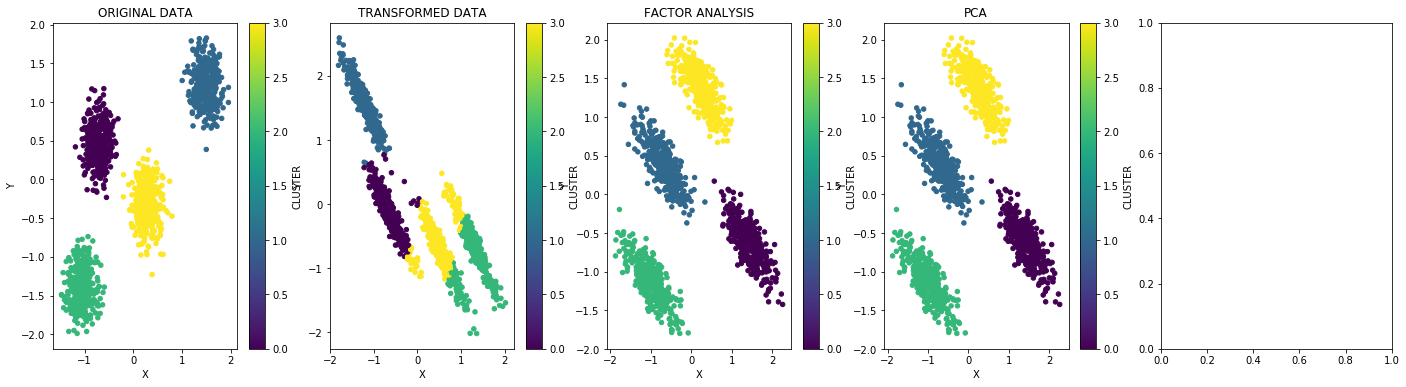

In [432]:
#next PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_aniso)
print(pca.explained_variance_ratio_)
X_PCA=pca.fit_transform(X_aniso)
X_pd=pd.DataFrame(X_PCA,columns=["X","Y"])
X_pd=(X_pd-X_pd.mean())/X_pd.std()

kmeans = KMeans(n_clusters=4, random_state=0,max_iter=3000).fit(X_pd.values)

X_pd["CLUSTER"]=kmeans.labels_
X_pd.plot.scatter(x="X",y="Y",c="CLUSTER",colormap='viridis',ax=axs[3])
axs[3].set_title("PCA")
fig

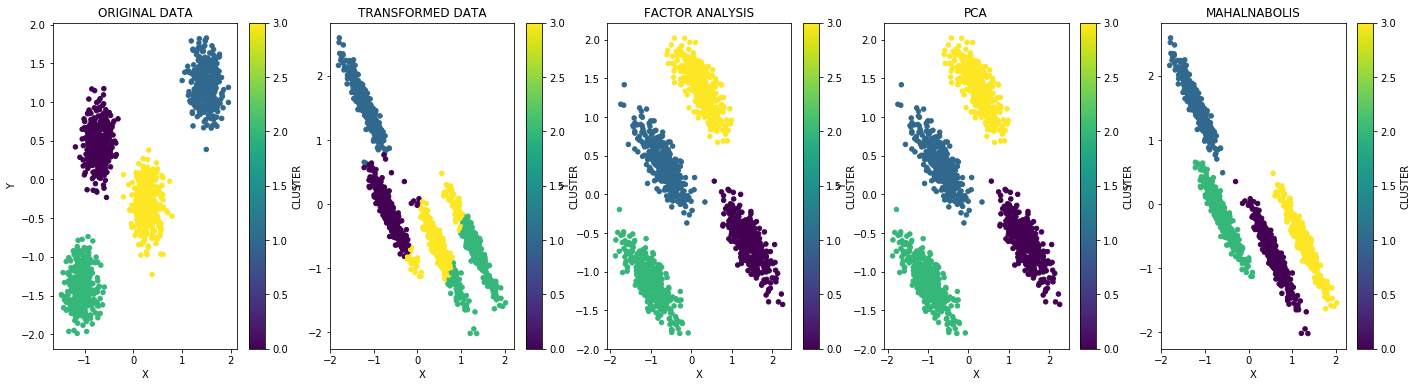

In [433]:
#dr kovács
from sklearn import mixture
clf = mixture.GaussianMixture(n_components=4, covariance_type='full')
X_pd=pd.DataFrame(X_aniso,columns=["X","Y"])
X_pd=(X_pd-X_pd.mean())/X_pd.std()

clf.fit(X_pd.values)
X_pd["CLUSTER"]=clf.predict(X_pd.values)
X_pd.plot.scatter(x="X",y="Y",c="CLUSTER",colormap='viridis',ax=axs[4])
axs[4].set_title("MAHALNABOLIS")
fig

In [434]:
#factor analysis on the original credit card data

pca = PCA(n_components=5)
pca.fit(inputDataNormalized.values)
print(pca.explained_variance_ratio_)
X_PCA=pca.fit_transform(inputDataNormalized[feature_columns].values)
X_PCA=(X_PCA-X_PCA.mean())/X_PCA.std()

kmeans = KMeans(n_clusters=5, random_state=0,max_iter=3000).fit(X_PCA)

inputDataNormalized["CLUSTERING_1"]=kmeans.labels_
inputDataNormalized["CLUSTERING_1"].value_counts()

[0.27290037 0.20301991 0.08791979 0.07479975 0.06262792]


3    3915
1    2998
4    1208
2     799
0      30
Name: CLUSTERING_1, dtype: int64

In [435]:
#first, lets see what are our main components


In [436]:
#now we can plot the results
#i am going to plot a scatterplot using the first 2 components
principal_components=pd.DataFrame(pca.u,index=np.arange(5),columns=feature_columns).transpose()
principal_components

,0,1,2,3,4
BALANCE,0.101077,0.403957,-0.160075,0.283454,0.047603
BALANCE_FREQUENCY,0.120043,0.130537,-0.420630,0.149742,-0.484563
PURCHASES,0.411642,0.041038,0.257903,0.039111,0.031287
ONEOFF_PURCHASES,0.346407,0.062872,0.392115,0.078155,-0.155846
INSTALLMENTS_PURCHASES,0.336814,-0.018533,-0.110488,-0.051130,0.360266
CASH_ADVANCE,-0.023343,0.439242,-0.027345,-0.254586,0.096677
PURCHASES_FREQUENCY,0.321493,-0.190780,-0.374691,-0.188975,-0.092436
ONEOFF_PURCHASES_FREQUENCY,0.294633,-0.017924,0.115131,0.027465,-0.531553
PURCHASES_INSTALLMENTS_FREQUENCY,0.274710,-0.178601,-0.473409,-0.215002,0.180203
CASH_ADVANCE_FREQUENCY,-0.089139,0.434082,-0.109072,-0.264228,-0.137405


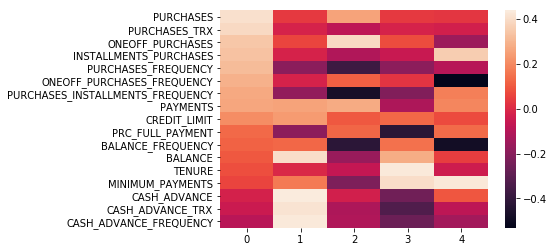

In [381]:
#heatmap of principal components
import seaborn as sns
ax = sns.heatmap(principal_components.sort_values(0,ascending=False))

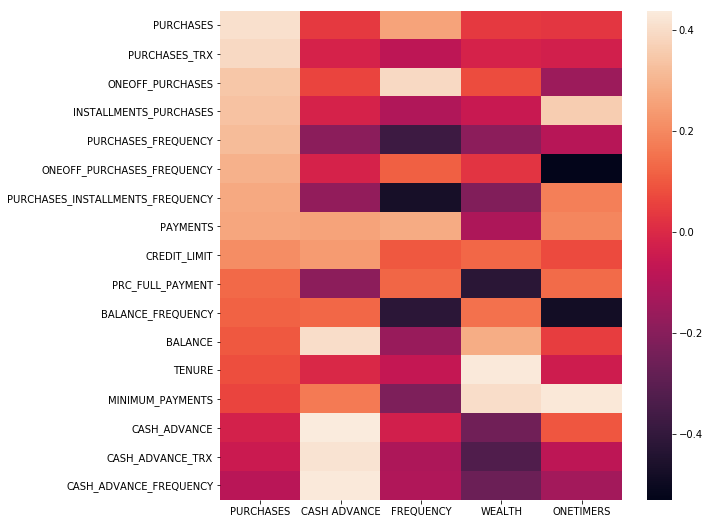

In [382]:
#lets name components!
component_names=["PURCHASES","CASH ADVANCE","FREQUENCY","WEALTH","ONETIMERS"]
principal_components.columns=component_names
fig,axes=plt.subplots(1,1,figsize=(9,9))
axes = sns.heatmap(principal_components.sort_values("PURCHASES",ascending=False),ax=axes)

In [383]:
#now lets 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2067: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024D28BC29B0>,
      dtype=object)

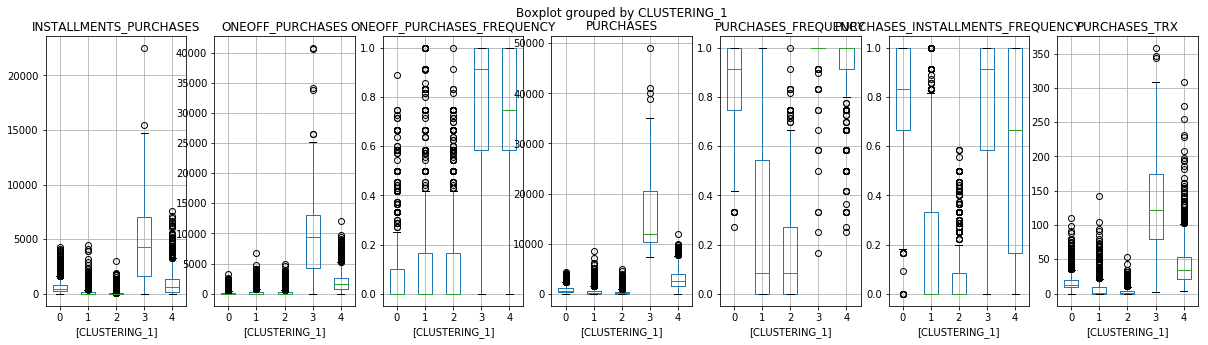

In [384]:
# less equal clusters then before, but this is not necessarily a bad thing
#maybe we just selecte t
#lets see the variables
#create boxplot
plt.close("all")
fig, axs = plt.subplots(1,len(purchase_features),figsize=(20,  5), sharey=False)

inputData[purchase_features+["CLUSTERING_1"]].boxplot(by="CLUSTERING_1",ax=axs)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2067: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024D28C23EB8>,
      dtype=object)

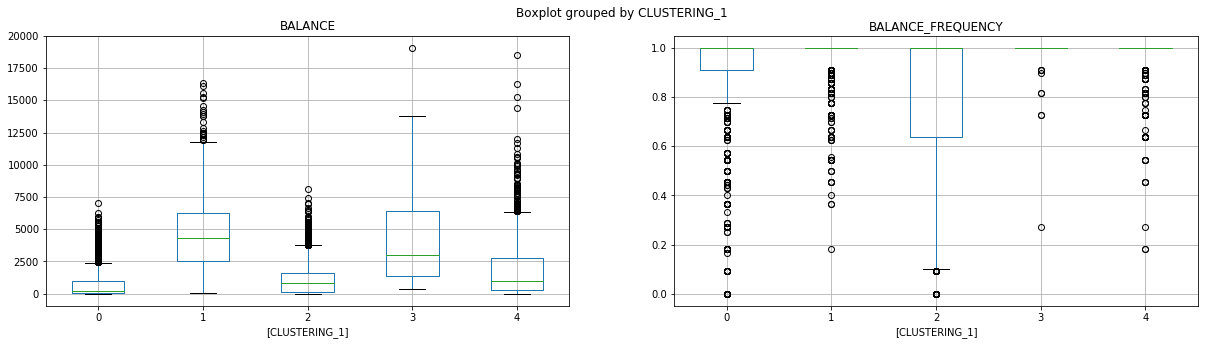

In [385]:
#create boxplot
plt.close("all")
fig, axs = plt.subplots(1,len(balance_features),figsize=(20,  5), sharey=False)

inputData[balance_features+["CLUSTERING_1"]].boxplot(by="CLUSTERING_1",ax=axs)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2067: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024D28C6E898>,
      dtype=object)

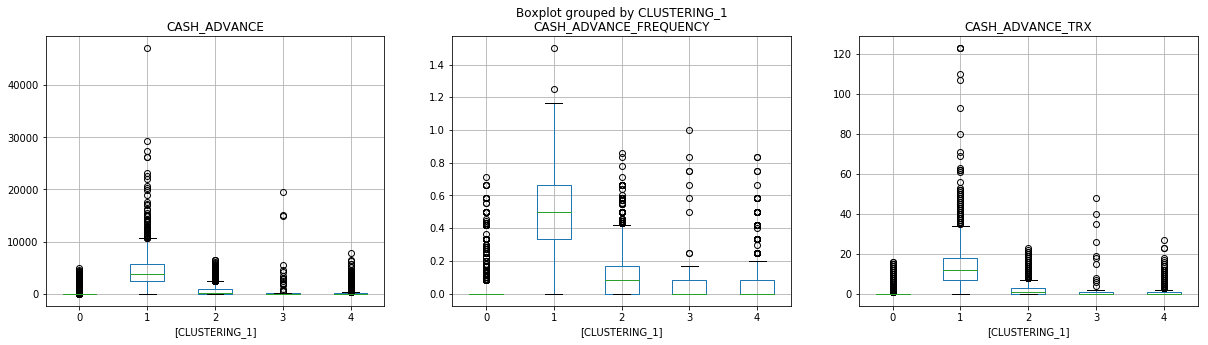

In [386]:

#create boxplot
plt.close("all")
fig, axs = plt.subplots(1,len(cash_advance_features),figsize=(20,  5), sharey=False)

inputData[cash_advance_features+["CLUSTERING_1"]].boxplot(by="CLUSTERING_1",ax=axs)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2067: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024D1DBADEF0>,
      dtype=object)

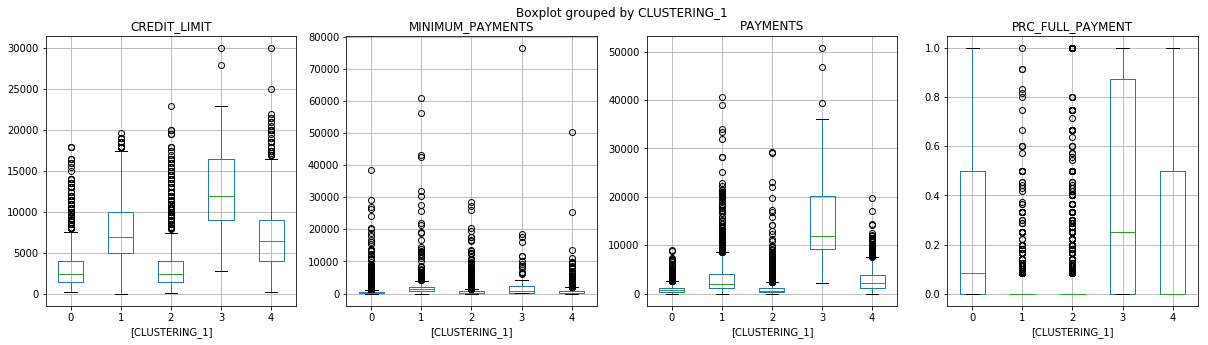

In [387]:

#create boxplot
plt.close("all")
fig, axs = plt.subplots(1,len(credit_features),figsize=(20,  5), sharey=False)

inputData[credit_features+["CLUSTERING_1"]].boxplot(by="CLUSTERING_1",ax=axs)

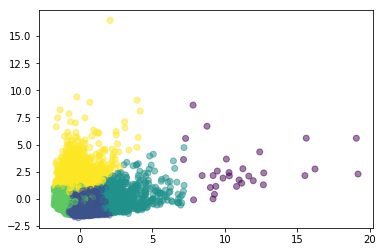

In [437]:
inputDataNormalizedFactorized=pd.DataFrame(X_PCA,columns=component_names)
inputDataNormalizedFactorized["CLUSTERING_1"]=kmeans.labels_
plt.scatter(inputDataNormalizedFactorized["PURCHASES"],
            inputDataNormalizedFactorized["CASH ADVANCE"],c=inputDataNormalizedFactorized["CLUSTERING_1"],alpha=0.5)


In [438]:
inputData.drop("CLUSTERING_1",inplace=True,axis=1)


In [439]:
inputData.skew()

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522549
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.867357
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

In [440]:
#from this we cansee that we still didnt find the right function  form
#exponentially distributed features must be LOGnormalized in order to get good separation
#select exponentially distributed features
to_be_logged_list=list(inputData.skew()[inputData.skew()>1].index)
for col in to_be_logged_list:
    print(col)
    inputData[col]=np.log(inputData[col]+1)
    

BALANCE
PURCHASES
ONEOFF_PURCHASES
INSTALLMENTS_PURCHASES
CASH_ADVANCE
ONEOFF_PURCHASES_FREQUENCY
CASH_ADVANCE_FREQUENCY
CASH_ADVANCE_TRX
PURCHASES_TRX
CREDIT_LIMIT
PAYMENTS
MINIMUM_PAYMENTS
PRC_FULL_PAYMENT


Interpreting. If skewness is positive, the data are positively skewed or skewed right, meaning that the right tail of the distribution is longer than the left. ... If skewness is less than −1 or greater than +1, the distribution is highly skewed

In [441]:
inputData.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,3.735304,0.818182,4.568506,0.000000,4.568506,0.000000,0.166667,0.000000,0.083333,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,12
C10002,8.071989,0.909091,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,12
C10003,7.822504,1.000000,6.651791,6.651791,0.000000,0.000000,1.000000,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,12
C10004,7.419183,0.636364,7.313220,7.313220,0.000000,5.331694,0.083333,0.080042,0.000000,0.080042,0.693147,0.693147,8.922792,0.000000,6.762968,0.000000,12
C10005,6.707735,1.000000,2.833213,2.833213,0.000000,0.000000,0.083333,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,12


In [442]:
inputData.skew()

BALANCE                            -0.861021
BALANCE_FREQUENCY                  -2.023266
PURCHASES                          -0.764492
ONEOFF_PURCHASES                    0.185854
INSTALLMENTS_PURCHASES             -0.024981
CASH_ADVANCE                        0.262594
PURCHASES_FREQUENCY                 0.060164
ONEOFF_PURCHASES_FREQUENCY          1.290617
PURCHASES_INSTALLMENTS_FREQUENCY    0.509201
CASH_ADVANCE_FREQUENCY              1.455462
CASH_ADVANCE_TRX                    0.940131
PURCHASES_TRX                       0.032697
CREDIT_LIMIT                       -0.101564
PAYMENTS                           -1.778312
MINIMUM_PAYMENTS                    0.185762
PRC_FULL_PAYMENT                    1.746046
TENURE                             -2.943017
dtype: float64

In [394]:
inputData.replace(np.nan,0,inplace=True)

In [443]:
#and now we can do the correct analysis
#step 1: logarithm
#step 2:  standardize
inputDataNormalized=(inputData-inputData.mean())/inputData.std()
inputData=(inputData-inputData.mean())/inputData.std()

#step 3: PCA

pca = PCA(n_components=5)
pca.fit(inputDataNormalized.values)
print(pca.explained_variance_ratio_)
X_PCA=pca.fit_transform(inputDataNormalized[feature_columns].values)
X_PCA=(X_PCA-X_PCA.mean())/X_PCA.std()

kmeans = KMeans(n_clusters=5, random_state=0,max_iter=3000).fit(X_PCA)

inputDataNormalized["CLUSTERING_1"]=kmeans.labels_
inputDataNormalized["CLUSTERING_1"].value_counts()

[0.34201976 0.21682047 0.09500097 0.07371159 0.0667601 ]


3    2323
0    1890
2    1827
1    1564
4    1346
Name: CLUSTERING_1, dtype: int64

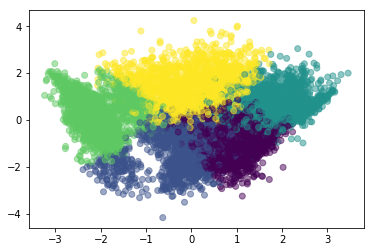

In [444]:
inputDataNormalizedFactorized=pd.DataFrame(X_PCA,columns=component_names)
inputDataNormalizedFactorized["CLUSTERING_1"]=kmeans.labels_
plt.scatter(inputDataNormalizedFactorized["PURCHASES"],
            inputDataNormalizedFactorized["CASH ADVANCE"],c=inputDataNormalizedFactorized["CLUSTERING_1"],alpha=0.5)


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


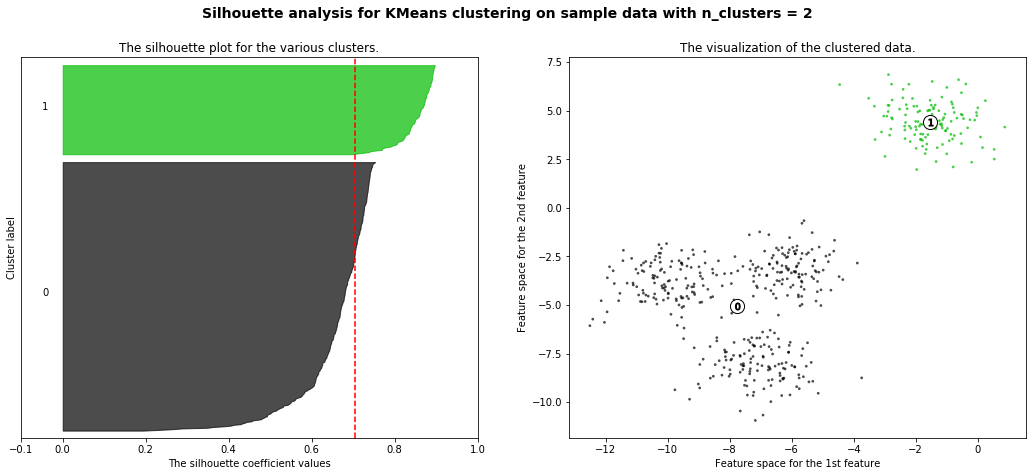

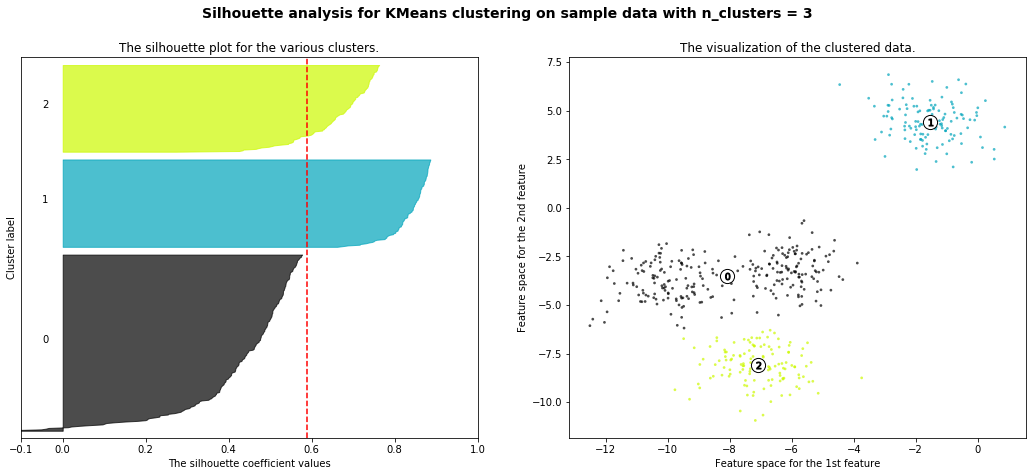

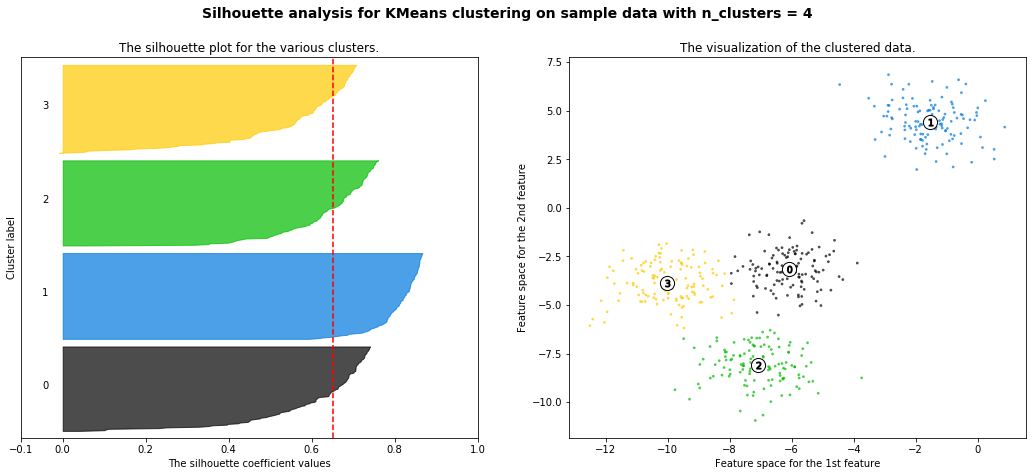

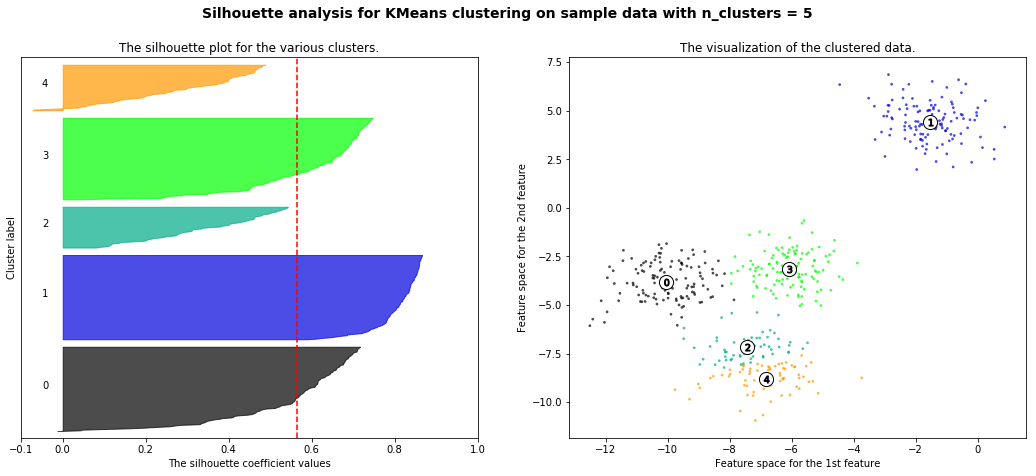

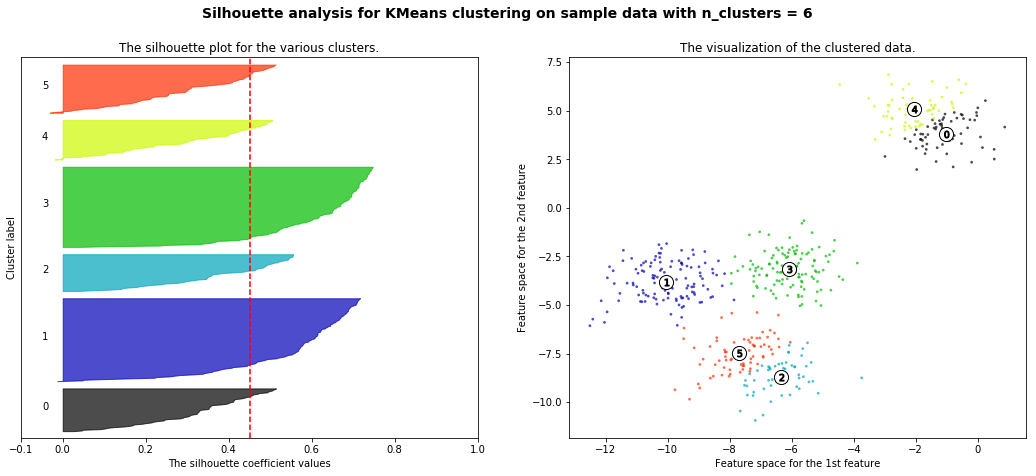

In [445]:
#analyze separation, and the correct numberr of clusters
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.3127535428314235
For n_clusters = 3 The average silhouette_score is : 0.28503809338970176
For n_clusters = 4 The average silhouette_score is : 0.27568841835767943
For n_clusters = 5 The average silhouette_score is : 0.2844555728098717
For n_clusters = 6 The average silhouette_score is : 0.28610439484321465


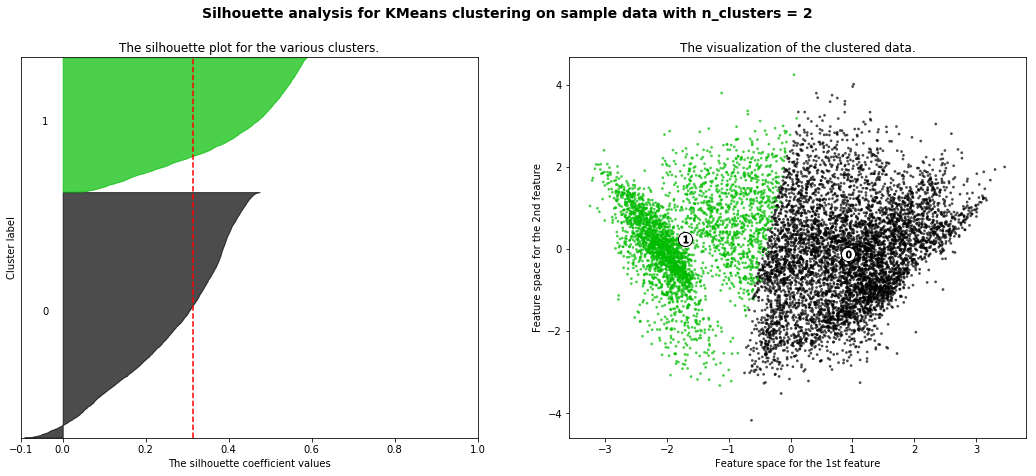

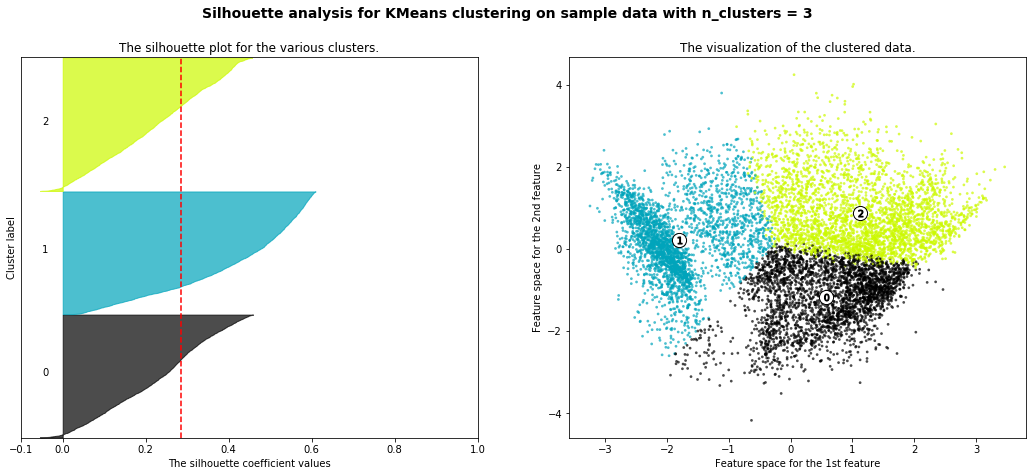

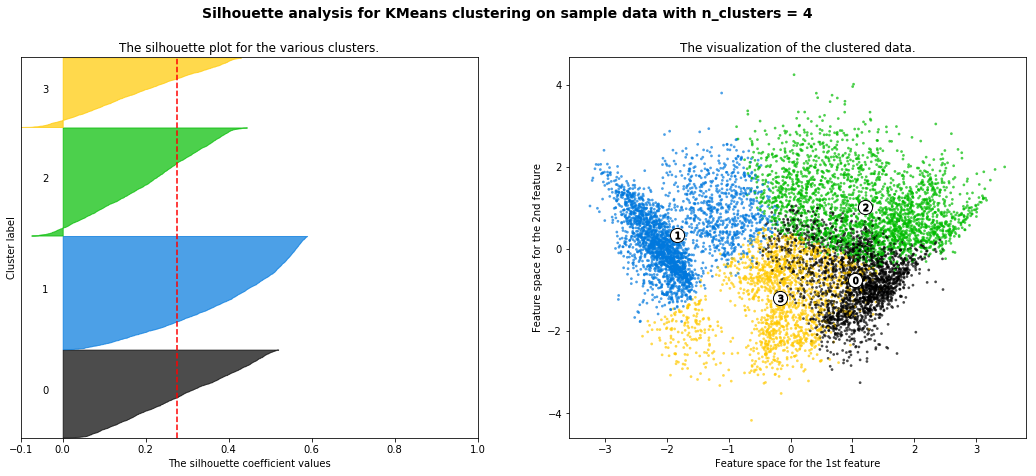

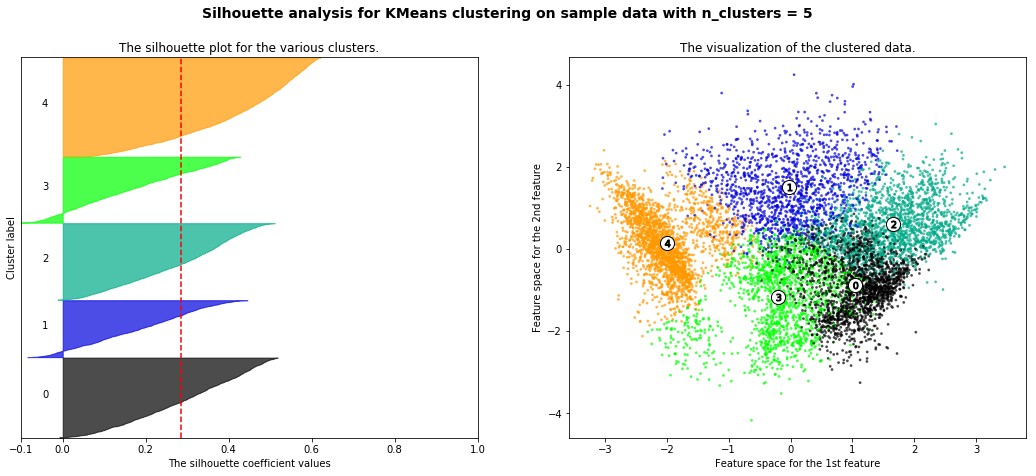

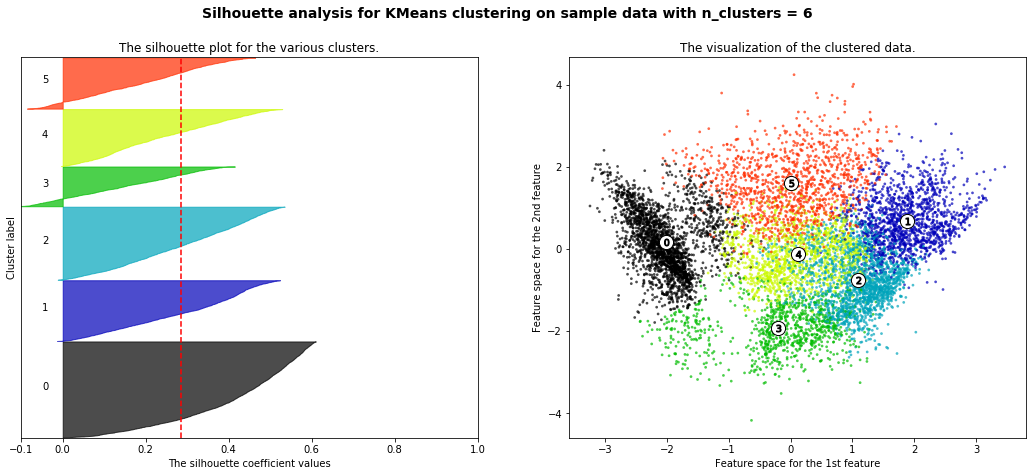

In [398]:
#substituting own stuff


print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility
X=inputDataNormalizedFactorized[component_names].values
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


In [446]:
balance_features=["BALANCE","BALANCE_FREQUENCY"]
purchase_features=["PURCHASES","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","PURCHASES_FREQUENCY","ONEOFF_PURCHASES_FREQUENCY",\
                   "PURCHASES_INSTALLMENTS_FREQUENCY","PURCHASES_TRX"]
cash_advance_features=["CASH_ADVANCE","CASH_ADVANCE_FREQUENCY","CASH_ADVANCE_TRX"]
credit_features=["CREDIT_LIMIT","PAYMENTS","MINIMUM_PAYMENTS","PRC_FULL_PAYMENT"]
tenure_features=["TENURE"]
feature_groups=[balance_features,purchase_features,cash_advance_features,credit_features,tenure_features]


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2067: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)


Text(0.5,1.08,'BALANCE FEATURES')

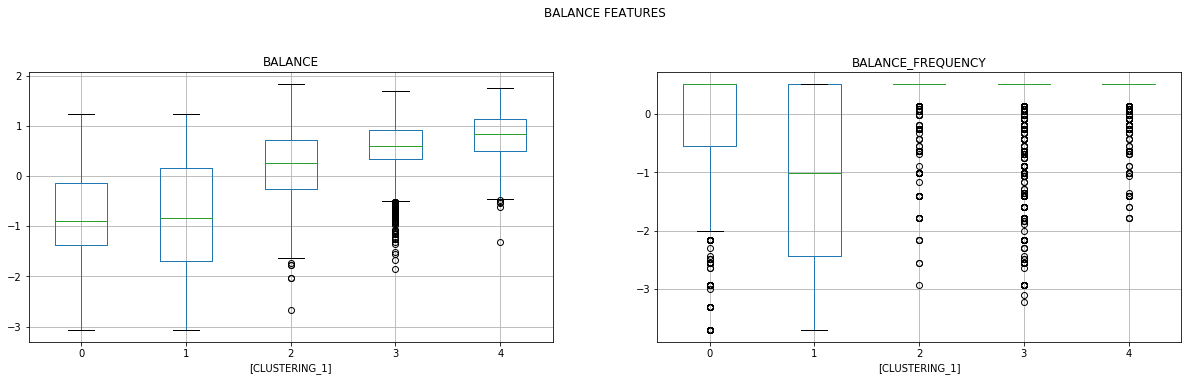

In [447]:
#lets name the clusters
#for this we will use box plots on the ORIGINAL variables
#create boxplot
plt.close("all")
fig, axs = plt.subplots(1,len(balance_features),figsize=(20,  5), sharey=False)

inputData["CLUSTERING_1"]=kmeans.labels_
inputData[balance_features+["CLUSTERING_1"]].boxplot(by="CLUSTERING_1",ax=axs)
fig.suptitle("BALANCE FEATURES",y=1.08)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2067: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)


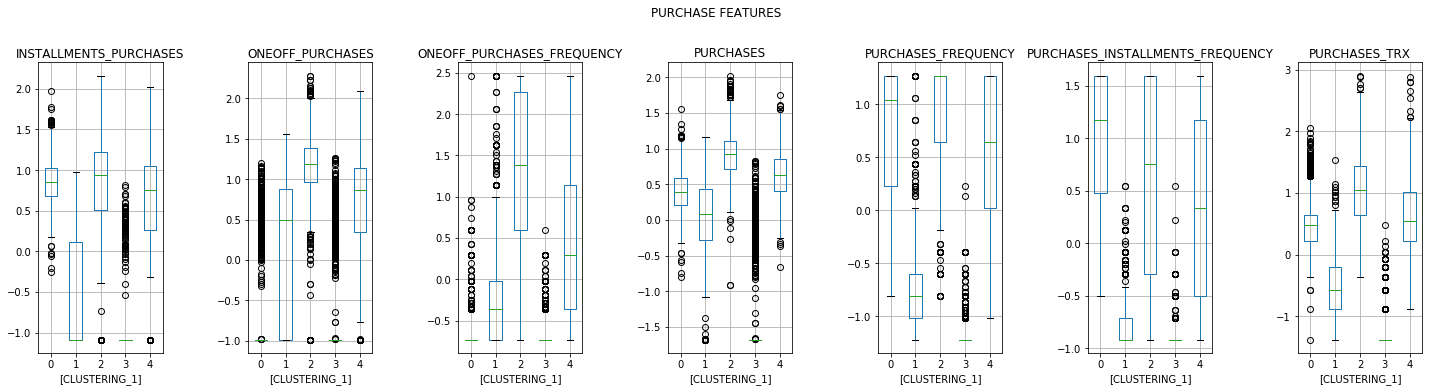

In [448]:
#lets name the clusters
#for this we will use box plots on the ORIGINAL variables
#create boxplot
plt.close("all")
fig, axs = plt.subplots(1,len(purchase_features),figsize=(20,  5), sharey=False)

inputData[purchase_features+["CLUSTERING_1"]].boxplot(by="CLUSTERING_1",ax=axs)
fig.suptitle("PURCHASE FEATURES",y=1.08)

plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2067: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)


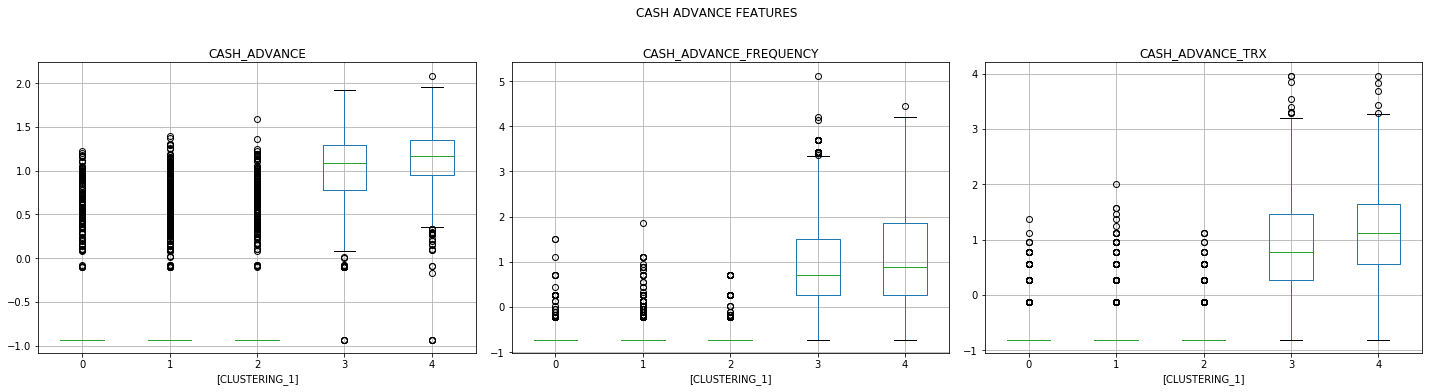

In [449]:
#lets name the clusters
#for this we will use box plots on the ORIGINAL variables
#create boxplot
plt.close("all")
fig, axs = plt.subplots(1,len(cash_advance_features),figsize=(20,  5), sharey=False)

inputData[cash_advance_features+["CLUSTERING_1"]].boxplot(by="CLUSTERING_1",ax=axs)
fig.suptitle("CASH ADVANCE FEATURES",y=1.08)

plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2067: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)


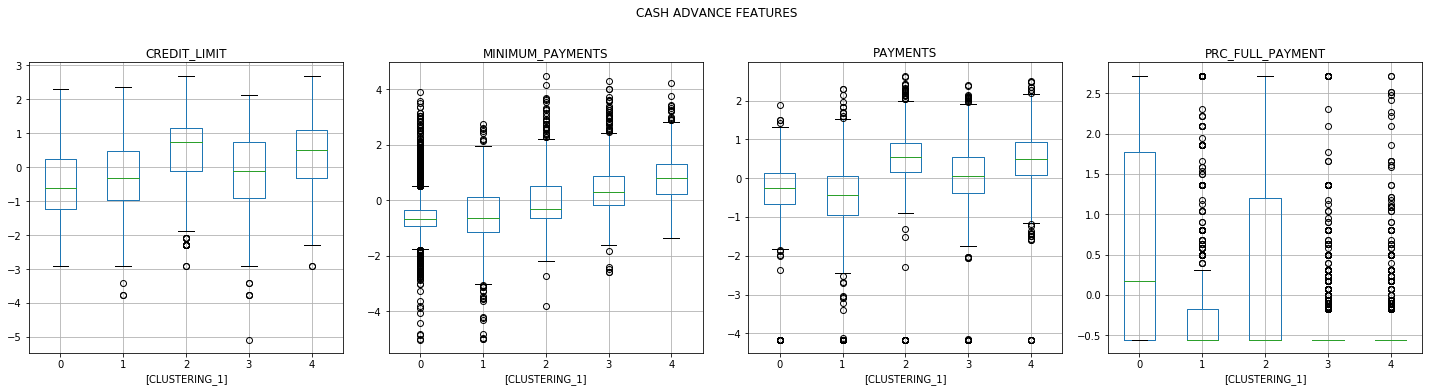

In [450]:
#lets name the clusters
#for this we will use box plots on the ORIGINAL variables
#create boxplot
plt.close("all")
fig, axs = plt.subplots(1,len(credit_features),figsize=(20,  5), sharey=False)

inputData[credit_features+["CLUSTERING_1"]].boxplot(by="CLUSTERING_1",ax=axs)
fig.suptitle("CASH ADVANCE FEATURES",y=1.08)

plt.tight_layout()

In [404]:
#cluster 1
# low balance lower balance frequency
#high purchase frequency
#always pays back

#cluster 2
#low balance, LOW balance frequency
#very low purchases, low purchase frequency
#low payments

#cluster 3
#avg balance, high balance frequency
#highest purchases
#high credit limit, high purchases
#usually repays in full

#cluster 4
#high balance, high frequency
#NO purchases
#frequent cash  advance
#never repays
#
cluster_names=["CONSCIOUS","LOW_ACTIVITY","BIG_SPENDERS","CASH_ADVANCE","ONEOFF_CASH_ADVANCE"]
#and now go make a ppt
#thanks you!